In [0]:
from google.colab import drive
drive.mount('/content/drive')

### SVHN neural network using Keras

### Loading the dataset : Lets us load the training and the test data and check the size of the tensors. Lets us also display the first few images from the training set. (5 points)

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Open the file as readonly

h5f = h5py.File('/content/drive/My Drive/DLCP/Project-1/Data/SVHN_single_grey1.h5', 'r')


# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_val = h5f['X_test'][:]
y_val = h5f['y_test'][:]


# Close this file
h5f.close()

print('Training set', x_train.shape, y_train.shape)
print('Test set', x_val.shape, y_val.shape)
print("\n")

# Flatten the images for keras model

x_train = x_train.reshape(x_train.shape[0], 1024)
x_val = x_val.reshape(x_val.shape[0], 1024)

# # normalize inputs from 0-255 to 0-1
x_train = x_train / 255.0
x_val = x_val / 255.0

Training set (42000, 32, 32) (42000,)
Test set (18000, 32, 32) (18000,)




In [4]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
num_classes = 10
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

In [6]:
print("('Training set', {}, {})('Test set', {}, {})".format(x_train.shape, y_train.shape, x_val.shape, y_val.shape))

('Training set', (42000, 1024), (42000, 10))('Test set', (18000, 1024), (18000, 10))


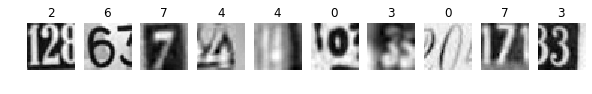

In [21]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(32, 32), cmap="gray")
    plt.title("{}".format(list(y_train[i]).index(max(y_train[i]))))
    plt.axis('off')
plt.show()
# print('label for each of the above image: %s' % (y_train[0:10]))

###Build the Neural Network Model in Keras (10 Points)

In [0]:
# Import all the that you need
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras import regularizers

#define the train and test loops and return score
def train_and_test_loop(iterations, lr, Lambda, verb=True):
    ## Define hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 32
    output_nodes = 10
   
    # Build the building blocks : Hidden layers, output layers, activation functions, optimizers
    model = Sequential()
    model.add(Dense(32, input_shape=(1024, ), 
              kernel_regularizer=regularizers.l2(Lambda), 
              activity_regularizer=regularizers.l1(Lambda)))
    model.add(Activation('relu'))
    model.add(Dense(10, input_shape=(1024, ), 
              kernel_regularizer=regularizers.l2(Lambda), 
              activity_regularizer=regularizers.l1(Lambda)))
    model.add(Activation('softmax'))
    
    sgd = SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)
    # Compile the model
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Fit the model
    model.fit(x_train, y_train, epochs=iterations, batch_size=32)
    
    
def train_and_test_loop1(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 32
    output_nodes = 10

    #Build the building blocks : Hidden layers, output layers, activation functions, optimizers
    model = Sequential()
    model.add(Dense(32, input_shape=(1024, ), 
              kernel_regularizer=regularizers.l2(Lambda), 
              activity_regularizer=regularizers.l1(Lambda)))
    model.add(Activation('relu'))
    model.add(Dense(10, input_shape=(1024, ), 
              kernel_regularizer=regularizers.l2(Lambda), 
              activity_regularizer=regularizers.l1(Lambda)))
    model.add(Activation('softmax'))
    
    sgd = SGD(lr=learning_rate)
    
    # Compile the model
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Fit the model
    model.fit(x_train, y_train, epochs=iterations, batch_size=32)
    
    # Calculate score and return score
    score = model.evaluate(x_val, y_val, batch_size=16)
    return score

### Babysitting the learning process. Complete all the steps below to optimize your model (15 points)

### Step 1: Double Check that the loss is reasonable : Disable the regularization

In [10]:
lr = 0.001
Lambda = 0
score = train_and_test_loop(1, lr, Lambda)

Epoch 1/1
42000/42000 [==============================] - 2s 53us/step - loss: 2.2898 - acc: 0.1315


### Step 2: Now, lets crank up the Lambda(Regularization)and check what it does to our loss function.

In [11]:
lr = 0.001
Lambda = 0.01
score = train_and_test_loop(1, lr, Lambda)

Epoch 1/1
42000/42000 [==============================] - 2s 58us/step - loss: 3.5689 - acc: 0.1026


### Step 3: Now, lets overfit to a small subset of our dataset, in this case 20 images.

In [0]:
x_train_subset = x_train[0:20]
y_train_subset = y_train[0:20]


In [0]:
x_train = x_train_subset
y_train = y_train_subset

In [14]:
x_train.shape

(20, 1024)

In [15]:
y_train.shape

(20, 10)

### Tip: Make sure that you can overfit very small portion of the training data
So, set a small learning rate and turn regularization off

In the code below:
- Take the first 20 examples from SVHN
- turn off regularization(reg=0.0)
- use simple vanilla 'sgd'

In [16]:
lr = 0.01
Lambda = 0.0
train_and_test_loop(60, lr, Lambda)

Epoch 1/60
20/20 [==============================] - 0s 11ms/step - loss: 2.2753 - acc: 0.1000
Epoch 2/60
20/20 [==============================] - 0s 245us/step - loss: 2.0999 - acc: 0.3000
Epoch 3/60
20/20 [==============================] - 0s 220us/step - loss: 1.9871 - acc: 0.2500
Epoch 4/60
20/20 [==============================] - 0s 230us/step - loss: 1.9048 - acc: 0.2500
Epoch 5/60
20/20 [==============================] - 0s 104us/step - loss: 1.8382 - acc: 0.3000
Epoch 6/60
20/20 [==============================] - 0s 114us/step - loss: 1.7787 - acc: 0.3000
Epoch 7/60
20/20 [==============================] - 0s 104us/step - loss: 1.7270 - acc: 0.4000
Epoch 8/60
20/20 [==============================] - 0s 152us/step - loss: 1.6716 - acc: 0.4500
Epoch 9/60
20/20 [==============================] - 0s 126us/step - loss: 1.6156 - acc: 0.5000
Epoch 10/60
20/20 [==============================] - 0s 131us/step - loss: 1.5697 - acc: 0.5500
Epoch 11/60
20/20 [==============================]

### Loading the original dataset again

In [17]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Open the file as readonly

h5f = h5py.File('/content/drive/My Drive/DLCP/Project-1/Data/SVHN_single_grey1.h5', 'r')


# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_val = h5f['X_test'][:]
y_val = h5f['y_test'][:]


# Close this file
h5f.close()

print('Training set', x_train.shape, y_train.shape)
print('Test set', x_val.shape, y_val.shape)
print("\n")

# Flatten the images for keras model

x_train = x_train.reshape(x_train.shape[0], 1024)
x_val = x_val.reshape(x_val.shape[0], 1024)

# # normalize inputs from 0-255 to 0-1
x_train = x_train / 255.0
x_val = x_val / 255.0

num_classes = 10
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

print("('Training set', {}, {})('Test set', {}, {})".format(x_train.shape, y_train.shape, x_val.shape, y_val.shape))

Training set (42000, 32, 32) (42000,)
Test set (18000, 32, 32) (18000,)


('Training set', (42000, 1024), (42000, 10))('Test set', (18000, 1024), (18000, 10))


###Step 4: Start with small regularization and find learning rate that makes the loss go down.

- we start with Lambda(small regularization) = 1e-7
- we start with a small learning rate =1e-7

In [102]:
#set the hyperparameters according to the above instructions
lr = 1e-3 # 1e-7 2.3x to 2.28 for 1e-3, for 1e-2 not less than 1e-3
Lambda = 1e-7
#call the train and test function
train_and_test_loop(1, lr, Lambda)

Epoch 1/1
42000/42000 [==============================] - 5s 130us/step - loss: 2.2821 - acc: 0.1442


### Step 5: Okay now lets try a (larger) learning rate . What could possibly go wrong?

- Learning rate lr  
- Regularization lambda 


In [106]:
#Set Hyperparameters( High value for lr and low values for lambda)
lr_list = [1e-1, 1e-2, 1e-3, 1e-4]
lambda_list = [1e-8, 1e-7, 1e-6, 1e-5]
for lr in lr_list:
  Lambda = lambda_list[0]
  print("Lambda: {:.8f}, LR: {:.4f}".format(Lambda, lr), end='\t')
  train_and_test_loop(1, lr, Lambda)
# Call the train and test function

Lambda: 0.00000001, LR: 0.1000	Epoch 1/1
42000/42000 [==============================] - 6s 154us/step - loss: 2.3101 - acc: 0.1014
Lambda: 0.00000001, LR: 0.0100	Epoch 1/1
42000/42000 [==============================] - 6s 142us/step - loss: 2.3040 - acc: 0.0998
Lambda: 0.00000001, LR: 0.0010	Epoch 1/1
42000/42000 [==============================] - 6s 148us/step - loss: 2.2875 - acc: 0.1321
Lambda: 0.00000001, LR: 0.0001	Epoch 1/1
42000/42000 [==============================] - 7s 162us/step - loss: 2.3121 - acc: 0.1151


## Documentation

Set Hyperparameters( High value for lr and low values for lambda)

Using lambda values and learning rate values, and running through the loops, we get following observations:

* Generally Learning Rate: `1e-3` is a good starting point to compare results. 

* Increasing Learning Rate increases the loss since it might miss the global minima in the race of finding local minima.

* Too small LR generally makes the process slower. (For example for 1e-4 it took 7 seconds, compared to other LRs)

### Hyperparameter Optimization

### Cross validation Strategy


- Do coarse -> fine cross-validation in stages

- First stage: only a few epochs to get rough idea of what params work
- Second stage: longer running time, finer search
- … (repeat as necessary)

### Tip for detecting explosions in the solver: 
- If the cost is ever > 3 * original cost, break out early


In [21]:
import math
for k in range(1,20):
    lr = math.pow(10, np.random.uniform(-7.0, 4.0))
    Lambda = math.pow(3, np.random.uniform(-5,5))
    best_acc = train_and_test_loop1(10, lr, Lambda)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc[1], lr, Lambda))

Epoch 1/10
42000/42000 [==============================] - 5s 115us/step - loss: 54417.4619 - acc: 0.1007
Epoch 2/10
42000/42000 [==============================] - 3s 63us/step - loss: 30330.2510 - acc: 0.1005
Epoch 3/10
42000/42000 [==============================] - 3s 63us/step - loss: 30029.4003 - acc: 0.0987
Epoch 4/10
42000/42000 [==============================] - 3s 63us/step - loss: 32973.1609 - acc: 0.0986
Epoch 5/10
42000/42000 [==============================] - 3s 63us/step - loss: 29394.7007 - acc: 0.1003
Epoch 6/10
42000/42000 [==============================] - 3s 64us/step - loss: 25957.5301 - acc: 0.0992
Epoch 7/10
42000/42000 [==============================] - 3s 63us/step - loss: 28184.9484 - acc: 0.1005
Epoch 8/10
42000/42000 [==============================] - 3s 63us/step - loss: 26256.2947 - acc: 0.1010
Epoch 9/10
42000/42000 [==============================] - 3s 63us/step - loss: 50813.3300 - acc: 0.0997
Epoch 10/10
18000/18000 [==============================] - 2s 1

### Now run finer search

In [22]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-3.0, -2.0))
    Lambda = math.pow(10, np.random.uniform(-5,2))
    best_acc = train_and_test_loop(1, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/1
42000/42000 [==============================] - 6s 140us/step - loss: 2.6885 - acc: 0.1115
Try 1/100: Best_val_acc: None, lr: 0.0020040290996236726, Lambda: 0.003061818286394544

Epoch 1/1
42000/42000 [==============================] - 6s 139us/step - loss: nan - acc: 0.0992
Try 2/100: Best_val_acc: None, lr: 0.0020966739380652967, Lambda: 15.410392818767882

Epoch 1/1
42000/42000 [==============================] - 6s 140us/step - loss: nan - acc: 0.1008
Try 3/100: Best_val_acc: None, lr: 0.006708929668292378, Lambda: 1.5361792252962088

Epoch 1/1
42000/42000 [==============================] - 6s 142us/step - loss: nan - acc: 0.0985
Try 4/100: Best_val_acc: None, lr: 0.003006232764717569, Lambda: 4.769587324404851

Epoch 1/1
42000/42000 [==============================] - 6s 143us/step - loss: nan - acc: 0.0994
Try 5/100: Best_val_acc: None, lr: 0.005565223875129477, Lambda: 20.414903250247587

Epoch 1/1
42000/42000 [==============================] - 6s 145us/step - loss: 5.181